<a href="https://colab.research.google.com/github/PaulLuquePJLT/Analysis-ConnectaTel/blob/main/S7_V1_Paul_Luque_Project_ConnectaTel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis ConnectaTel

Como **analista de datos**, tu objetivo es evaluar el **comportamiento de los clientes** de una empresa de telecomunicaciones en Latinoamérica, ConnectaTel.

Trabajaremos con información registrada **hasta el año 2024**, lo cual permitirá analizar el comportamiento del negocio dentro de ese periodo.

Para ello trabajarás con tres datasets:  

- **plans.csv** → información de los planes actuales (precio, minutos incluidos, GB incluidos, costo por extra)  
- **users.csv** → información de los clientes (edad, ciudad, fecha de registro, plan, churn)  
- **usage.csv** → detalle del **uso real** de los servicios (llamadas y mensajes)  

Deberás **explorar**, **limpiar** y **analizar** estos datos para construir un **perfil estadístico** de los clientes, detectar **comportamientos atípicos** y crear **segmentos de clientes**.  

Este análisis te permitirá **identificar patrones de consumo**, **diseñar estrategias de retención** y **sugerir mejoras en los planes** ofrecidos por la empresa.

> 💡 Antes de empezar, recuerda pensar de forma **programática**: ¿qué pasos necesitas? ¿En qué orden? ¿Qué quieres medir y por qué?


---
## 🧩 Paso 1: Cargar y explorar

Antes de limpiar o combinar los datos, es necesario **familiarizarte con la estructura de los tres datasets**.  
En esta etapa, validarás que los archivos se carguen correctamente, conocerás sus columnas y tipos de datos, y detectarás posibles inconsistencias.

### 1.1 Carga de datos y vista rápida

**🎯 Objetivo:**  
Tener los **3 datasets listos en memoria**, entender su contenido y realizar una revisión preliminar.

**Instrucciones:**  
- Importa las librerías necesarias (por ejemplo `pandas`, `seaborn`, `matplotlib.pyplot`)
- Carga los archivos CSV usando `pd.read_csv()`:
  - **`/datasets/plans.csv`**  
  - **`/datasets/users_latam.csv`**  
  - **`/datasets/usage.csv`**  
- Guarda los DataFrames en las variables: `plans`, `users`, `usage`.  
- Muestra las primeras filas de cada DataFrame usando `.head()`.


In [ ]:
# importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# cargar archivos
plans = pd.read_csv('/datasets/plans.csv')
users = pd.read_csv('/datasets/users_latam.csv')#completa el código
usage = pd.read_csv('/datasets/usage.csv')#completa el código

In [ ]:
# mostrar las primeras 5 filas de plans
plans.head(5)

,plan_name,messages_included,gb_per_month,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,Basico,100,5,100,12,1.2,0.08,0.10
1,Premium,500,20,600,25,1.0,0.05,0.07


In [ ]:
# mostrar las primeras 5 filas de users
users.head(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,10000,Carlos,Garcia,38,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN
1,10001,Mateo,Torres,53,?,2022-01-01 06:34:17.914478619,Basico,NaN
2,10002,Sofia,Ramirez,57,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN
3,10003,Mateo,Ramirez,69,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN
4,10004,Mateo,Torres,63,GDL,2022-01-02 02:17:11.657914478,Basico,NaN


In [ ]:
# mostrar las primeras 5 filas de usage
usage.head(5)

,id,user_id,type,date,duration,length
0,1,10332,call,2024-01-01 00:00:00.000000000,0.09,NaN
1,2,11458,text,2024-01-01 00:06:30.969774244,NaN,39.0
2,3,11777,text,2024-01-01 00:13:01.939548488,NaN,36.0
3,4,10682,call,2024-01-01 00:19:32.909322733,1.53,NaN
4,5,12742,call,2024-01-01 00:26:03.879096977,4.84,NaN


**Tip:** Si no usas `print()` la tabla se vera mejor.

### 1.2 Exploración de la estructura de los datasets

**🎯 Objetivo:**  
Conocer la **estructura de cada dataset**, revisar cuántas filas y columnas tienen, identificar los **tipos de datos** de cada columna y detectar posibles **inconsistencias o valores nulos** antes de iniciar el análisis.

**Instrucciones:**  
- Revisa el **número de filas y columnas** de cada dataset usando `.shape`.  
- Usa `.info()` en cada DataFrame para obtener un **resumen completo** de columnas, tipos de datos y valores no nulos.  

In [ ]:
# revisar el número de filas y columnas de cada dataset
print("plans", plans.shape)
print("users", users.shape)
print("usage", usage.shape)


plans (2, 8)
users (4000, 8)
usage (40000, 6)


In [ ]:
# inspección de plans con .info()
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   plan_name          2 non-null      object 
 1   messages_included  2 non-null      int64  
 2   gb_per_month       2 non-null      int64  
 3   minutes_included   2 non-null      int64  
 4   usd_monthly_pay    2 non-null      int64  
 5   usd_per_gb         2 non-null      float64
 6   usd_per_message    2 non-null      float64
 7   usd_per_minute     2 non-null      float64
dtypes: float64(3), int64(4), object(1)
memory usage: 256.0+ bytes


In [ ]:
# inspección de users con .info()
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     4000 non-null   int64 
 1   first_name  4000 non-null   object
 2   last_name   4000 non-null   object
 3   age         4000 non-null   int64 
 4   city        3531 non-null   object
 5   reg_date    4000 non-null   object
 6   plan        4000 non-null   object
 7   churn_date  466 non-null    object
dtypes: int64(2), object(6)
memory usage: 250.1+ KB


In [ ]:
# inspección de usage con .info()
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        40000 non-null  int64  
 1   user_id   40000 non-null  int64  
 2   type      40000 non-null  object 
 3   date      39950 non-null  object 
 4   duration  17924 non-null  float64
 5   length    22104 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.8+ MB


---

## 🧩Paso 2: Identificación de problemas de calidad de datos

### 2.1 Revisión de valores nulos

**🎯 Objetivo:**  
Detectar la presencia y magnitud de valores faltantes para evaluar si afectan el análisis o requieren imputación/eliminación.

**Instrucciones:**  
- Cuenta valores nulos por columna para cada dataset.
- Calcula la proporción de nulos por columna para cada dataset.

El dataset `plans` solamente tiene 2 renglones y se puede observar que no tiene ausentes, por ello no necesita exploración adicional.

<br>
<details>
<summary>Haz clic para ver la pista</summary>
Usa `.isna().sum()` para contar valores nulos y usa `.isna().mean()` para calcular la proporción.

In [ ]:


# cantidad de nulos para users
print('# Cantidad de valores nulos')
print(users.isna().sum())
print()
print('# Proporción de valores nulos')
print(users.isna().mean())



# Cantidad de valores nulos
user_id          0
first_name       0
last_name        0
age              0
city           469
reg_date         0
plan             0
churn_date    3534
dtype: int64

# Proporción de valores nulos
user_id       0.00000
first_name    0.00000
last_name     0.00000
age           0.00000
city          0.11725
reg_date      0.00000
plan          0.00000
churn_date    0.88350
dtype: float64


In [ ]:

# cantidad de nulos para usage
print(usage.isna().sum())
print(usage.isna().mean())


id              0
user_id         0
type            0
date           50
duration    22076
length      17896
dtype: int64
id          0.00000
user_id     0.00000
type        0.00000
date        0.00125
duration    0.55190
length      0.44740
dtype: float64




✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico al final del bloque. Incluye qué ves y que acción recomendarías para cada caso.

💡 **Nota:** Justifica tus decisiones brevemente (1 línea por caso).

* Hint:
 - Si una columna tiene **más del 80–90% de nulos**, normalmente se **ignora o elimina**.  
 - Si tiene **entre 5% y 30%**, generalmente se **investiga para imputar o dejar como nulos**.  
 - Si es **menor al 5%**, suele ser un caso simple de imputación o dejar como nulos.

 ---

**Valores nulos**  
- ¿Qué columnas tienen valores faltantes y en qué proporción?  
- Indica qué harías: ¿imputar, eliminar, ignorar?

**Valores nulos (diagnóstico y acción recomendada)**

- **users.city (11.7% nulos)**: falta una proporción moderada de ciudades, recomiendo imputar con “Unknown”/“Sin ciudad” para no perder usuarios y poder segmentar sin eliminar filas.

- **users.churn_date (88.35% nulos)**: es una columna “condicional” no se debe imputar ni eliminar; dejar nulos.

- **usage.date (Menos del 1%; muy bajo vs total)**: porcentaje muy pequeño, recomiendo eliminar esas filas (no sirven para análisis temporal y el impacto es mínimo).

- **usage.duration (50% nulos)**: esperado si hay registros que no son llamadas (p. ej., mensajes), no imputar globalmente; mantener nulos y tratar por type (duración solo para call).

- **usage.length (44% nulos)**: esperado si hay registros que no son mensajes (p. ej., llamadas), no imputar globalmente; mantener nulos y tratar por type (length solo para message/sms).



### 2.2 Detección de valores inválidos y sentinels

🎯 **Objetivo:**  
Identificar sentinels: valores que no deberían estar en el dataset.

**Instrucciones:**
- Explora las columnas numéricas con **un resumen estadístico** y describe brevemente que encontraste.
- Explora las columnas categóricas **relevantes**, revisando sus valores únicos y describe brevemente que encontraste.


El dataset `plans` solamente tiene 2 renglones, por ello no necesita exploración adicional.

In [ ]:
# explorar columnas numéricas de users
users.describe()

,user_id,age
count,4000.000000,4000.000000
mean,11999.500000,33.739750
std,1154.844867,123.232257
min,10000.000000,-999.000000
25%,10999.750000,32.000000
50%,11999.500000,47.000000
75%,12999.250000,63.000000
max,13999.000000,79.000000


- La columna `user_id` se ve como un identificador numérico consecutivo (min 10000, max 13999), sin nulos y sin valores “raros” en rangos; no se analiza como variable numérica, solo se usa como clave para merges/agrupaciones.
- La columna `age` hay un valor centinela -999 (min = -999) y además la media/STD están distorsionadas (std muy alta) por ese/estos valores inválidos; reemplazar -999 por NaN y luego validar rango lógico (por ejemplo 0–100) e imputar/segmentar.

In [ ]:
# explorar columnas numéricas de usage
usage.describe()

,id,user_id,duration,length
count,40000.00000,40000.000000,17924.000000,22104.000000
mean,20000.50000,12002.405975,5.202237,52.127398
std,11547.14972,1157.279564,6.842701,56.611183
min,1.00000,10000.000000,0.000000,0.000000
25%,10000.75000,10996.000000,1.437500,37.000000
50%,20000.50000,12013.000000,3.500000,50.000000
75%,30000.25000,13005.000000,6.990000,64.000000
max,40000.00000,13999.000000,120.000000,1490.000000



- Las columnas `id`(PK) y `user_id`(FK) son identificadores (id va de 1 a 40000 y user_id cae en el rango 10000–13999); no se interpretan como variables numéricas, se usan como claves para unir/agrupaciones y revisar duplicados.
- Las columnas `duration` y `length` tienen muchos nulos porque dependen del tipo de evento (llamadas vs mensajes); además hay valores extremos (duration hasta 120 y length hasta 1490) y valores 0 que pueden ser válidos o sospechosos. Acción: analizar por type (duration solo para call, length solo para message/sms), validar si los 0 son lógicos, y revisar outliers (IQR/Z-score) en cada tipo por separado.


In [ ]:


# explorar columnas categóricas de users
columnas_user = ['city', 'plan']


print(users.nunique().sort_values())

for col in columnas_user:
    print(col)
    print("Frecuencia absoluta")
    print(users[col].value_counts(dropna=False))
    print("Frecuencia relativa (%)")
    print(users[col].value_counts(normalize=True, dropna=False) * 100)
    print()




plan             2
last_name        5
first_name       6
city             7
age             63
churn_date     197
reg_date      3961
user_id       4000
dtype: int64
city
Frecuencia absoluta
Bogotá      808
CDMX        730
Medellín    616
NaN         469
GDL         450
Cali        424
MTY         407
?            96
Name: city, dtype: int64
Frecuencia relativa (%)
Bogotá      20.200
CDMX        18.250
Medellín    15.400
NaN         11.725
GDL         11.250
Cali        10.600
MTY         10.175
?            2.400
Name: city, dtype: float64

plan
Frecuencia absoluta
Basico     2595
Premium    1405
Name: plan, dtype: int64
Frecuencia relativa (%)
Basico     64.875
Premium    35.125
Name: plan, dtype: float64



- La columna `city` Tiene 11.725% nulos y además aparece el valor "?" (2.4%), que es un “placeholder”.
Se debe estandarizar ambos como "Unknown".
- La columna `plan` Tiene solo 2 planes: Basico (64.875%) y Premium (35.125%). Se debe dejar tal cual, solo normalizar texto (strip / mayúsculas) para evitar variantes.

In [ ]:

# explorar columna categórica de usage
usage['type'].value_counts(dropna=False)



text    22092
call    17908
Name: type, dtype: int64

- La columna `type` tiene 2 categorías (text y call) con distribución aproximada de 55% text (22092) y 45% call (17908). Esto confirma que duration aplica a call y length aplica a text, por lo que los nulos en esas columnas son esperados y deben analizarse separando por type.


---
✍️ **Comentario**: Haz doble clic en este bloque y escribe tu diagnóstico. Incluye qué ves y que acción recomendarías para cada caso.

**Valores inválidos o sentinels**  
- ¿En qué columnas encontraste valores inválidos o sentinels?  
- ¿Qué acción tomarías?

Valores inválidos o sentinels (diagnóstico y acción)

- users.age: aparece el sentinel -999 (edad imposible),se debe reemplazar -999 por NaN, validar rango lógico (p. ej. 0–100) y luego imputar/segmentar según necesidad.

- users.city: hay nulos (11.7%) y el valor "?" (2.4%) como marcador inválido → convertir "?" a NaN y luego rellenar con "Unknown" (o mantener NaN si el análisis lo requiere).

- usage.duration: muchos nulos porque solo aplica a eventos call; además hay 0 (posible llamada fallida) → no imputar globalmente, analizar/validar solo para type == "call" y decidir si duración 0 se conserva o se filtra.

- usage.length: muchos nulos porque solo aplica a eventos text; también hay 0 (mensaje vacío o error) y valores extremos (hasta 1490) → no imputar globalmente, analizar/validar solo para type == "text" y revisar outliers por IQR/Z-score.

### 2.3 Revisión y estandarización de fechas

**🎯 Objetivo:**  
Asegurar que las columnas de fecha estén correctamente formateadas y detectar años fuera de rango que indiquen errores de captura.

**Instrucciones:**  
- Convierte las columnas de fecha a tipo fecha y asegurate de que el código sea a prueba de errores.  
- Revisa cuántas veces aparece cada año.
- Identifica fechas imposibles (ej. años futuros o negativos).

Toma en cuenta que tenemos datos registrados hasta el año 2024.

In [ ]:
# Convertir a fecha la columna `reg_date` de users
users["reg_date"] = pd.to_datetime(users["reg_date"], errors="coerce")

In [ ]:
# Convertir a fecha la columna `date` de usage
usage['date'] = pd.to_datetime(usage['date'],errors="coerce")# completa el código

In [ ]:
# Revisar los años presentes en `reg_date` de users
print(users["reg_date"].dt.year.value_counts(dropna=False).sort_index())

2022    1314
2023    1316
2024    1330
2026      40
Name: reg_date, dtype: int64


En `reg_date`, se observan registros en 2022 (1314), 2023 (1316) y 2024 (1330), que son años válidos, pero también aparecen 40 registros en 2026, lo cual es inconsistente porque el dataset solo debería tener datos hasta 2024. Se deben marcar esas fechas de 2026 como inválidas (reemplazar por NaT) o excluir esos registros del análisis temporal, y reportarlo como posible error de captura.

In [ ]:
# Revisar los años presentes en `date` de usage
print(usage["date"].dt.year.value_counts(dropna=False).sort_index())

2024.0    39950
NaN          50
Name: date, dtype: int64


En `date`, En date (usage), casi todos los registros están en 2024 (39950) y hay 50 valores nulos. Esto sugiere que el periodo de uso está concentrado en 2024 y que los nulos son pocos. Se deben eliminar esas 50 filas sin fecha (o dejarlas fuera de análisis temporal), porque no se pueden ubicar en el tiempo.
Basaremos el análisis en estas fechas.

✍️ **Comentario**: escribe tu diagnóstico, e incluye **qué acción recomendarías** para cada caso:

**Fechas fuera de rango**  
- ¿Aparecen años imposibles? (años muy viejos o sin transcurrir al momento de guardar los datos)
- ¿Qué harías con ellas?


- users.reg_date: aparecen 40 registros en 2026, que es un año futuro respecto al límite del proyecto (datos hasta 2024), se recomienda marcar esas fechas como inválidas (NaT) o excluir esas filas en análisis temporal, y reportarlo como posible error de captura.

- usage.date: casi todo está en 2024 y solo hay 50 nulos → eliminar esas 50 filas (o dejarlas fuera del análisis por fecha) porque no se pueden asignar a un año/mes y el impacto es mínimo.

---

## 🧩Paso 3: Limpieza básica de datos

### 3.1 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Aplicar reglas de limpieza para reemplazar valores sentinels y corregir fechas imposibles.

**Instrucciones:**  
- En `age`, reemplaza el sentinel **-999** con la mediana.
- En `city`, reemplaza el sentinel `"?"` por valores nulos (`pd.NA`).  
- Marca como nulas (`pd.NA`) las fechas fuera de rango.

In [ ]:
# Reemplazar -999 por la mediana de age
age_mediana = users.loc[users["age"] != -999, "age"].median()
users["age"] = users["age"].replace(-999, age_mediana)

# Verificar cambios
users["age"].describe()


count    4000.000000
mean       48.136000
std        17.689919
min        18.000000
25%        33.000000
50%        48.000000
75%        63.000000
max        79.000000
Name: age, dtype: float64

In [ ]:
# Reemplazar ? por NA en city
users["city"] = users["city"].replace("?", pd.NA)

# Verificar cambios
users["city"].value_counts(dropna=False)



Bogotá      808
CDMX        730
Medellín    616
NaN         565
GDL         450
Cali        424
MTY         407
Name: city, dtype: int64

In [ ]:
# Marcar fechas futuras como NA para reg_date
users.loc[users["reg_date"].dt.year > 2024, "reg_date"] = pd.NaT

# Verificar cambios
print(users["reg_date"].dt.year.value_counts(dropna=False).sort_index())



2022.0    1314
2023.0    1316
2024.0    1330
NaN         40
Name: reg_date, dtype: int64


### 3.2 Corregir sentinels y fechas imposibles
**🎯 Objetivo:**  
Decidir qué hacer con los valores nulos según su proporción y relevancia.

**Instrucciones:**
- Verifica si los nulos en `duration` y `length` son **MAR**(Missing At Random) revisando si dependen de la columna `type`.  
  Si confirmas que son MAR, **déjalos como nulos** y justifica la decisión.

In [ ]:
# Verificación MAR en usage (Missing At Random) para duration
usage["duration"].isna().groupby(usage["type"]).mean().sort_values(ascending=False)

type
text    0.999276
call    0.000000
Name: duration, dtype: float64

In [ ]:
# Verificación MAR en usage (Missing At Random) para length
usage["length"].isna().groupby(usage["type"]).mean().sort_values(ascending=False)

type
call    0.99933
text    0.00000
Name: length, dtype: float64

Haz doble clic aquíy escribe que tu diagnostico de nulos en `duration` y `length`
En usage, los nulos sí dependen directamente de type, por lo que son MAR (Missing At Random) condicionado por el tipo de evento:

- duration: en text casi todo es nulo (~0.9993), y en call es ~0.0 → la duración solo aplica a llamadas, así que los nulos en text son esperados.

- length: en call casi todo es nulo (~0.9993), y en text es ~0.0 → la longitud solo aplica a mensajes, así que los nulos en call son esperados.

✅ Acción recomendada: no imputar estos nulos; dejarlos tal cual y analizar duration solo para type "call" y length solo para type "text".

---

## 🧩Paso 4: Summary statistics de uso por usuario


### 4.1 Agrupación por comportamiento de uso

🎯**Objetivo**: Resumir las variables clave de la tabla `usage` **por usuario**, creando métricas que representen su comportamiento real de uso histórico.

**Instrucciones:**:
1. Construye una tabla agregada de `usage` por `user_id` que incluya:
- número total de mensajes  
- número total de llamadas  
- total de minutos de llamadas

2. Renombra las columnas para que tengan nombres claros:  
- `cant_mensajes`  
- `cant_llamadas`  
- `cant_minutos_llamada`
3. Combina esta tabla con `users`.

In [ ]:

# Columnas auxiliares
usage["is_text"] = (usage["type"] == "text").astype(int)  # total de mensajes
usage["is_call"] = (usage["type"] == "call").astype(int)  # total de llamadas


# Agrupar información por usuario
usage_agg = (
    usage.groupby("user_id")
        .agg(
            is_text=("is_text", "sum"),
            is_call=("is_call", "sum"),
            duration=("duration", "sum")
        )
        .reset_index()
)

# observar resultado
usage_agg.head(3)



,user_id,is_text,is_call,duration
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:


# Renombrar columnas
usage_agg = usage_agg.rename(columns={
    "is_text": "cant_mensajes",
    "is_call": "cant_llamadas",
    "duration": "cant_minutos_llamada"
})

# observar resultado
usage_agg.head(3)




,user_id,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,7,3,23.70
1,10001,5,10,33.18
2,10002,5,2,10.74


In [ ]:
# Combinar la tabla agregada con el dataset de usuarios
user_profile = users.merge(usage_agg, on="user_id", how="left")

user_profile.head(5)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01


### 4.2 4.2 Resumen estadístico por usuario durante el 2024

🎯 **Objetivo:** Analizar las columnas numéricas y categóricas de los usuarios, para identificar rangos, valores extremos y distribución de los datos antes de continuar con el análisis.

**Instrucciones:**  
1. Para las columnas **numéricas** relevantes, obtén un resumen estadístico (media, mediana, mínimo, máximo, etc.).  
2. Para la columna **categórica** `plan`, revisa la distribución en **porcentajes** de cada categoría.

In [ ]:

# Resumen estadístico de las columnas numéricas
cols_numericas = ["age", "cant_mensajes", "cant_llamadas", "cant_minutos_llamada"]
print(user_profile[cols_numericas].describe())


               age  cant_mensajes  cant_llamadas  cant_minutos_llamada
count  4000.000000    3999.000000    3999.000000           3999.000000
mean     48.136000       5.524381       4.478120             23.317054
std      17.689919       2.358416       2.144238             18.168095
min      18.000000       0.000000       0.000000              0.000000
25%      33.000000       4.000000       3.000000             11.120000
50%      48.000000       5.000000       4.000000             19.780000
75%      63.000000       7.000000       6.000000             31.415000
max      79.000000      17.000000      15.000000            155.690000


In [ ]:
# Distribución porcentual del tipo de plan
print((user_profile["plan"].value_counts(normalize=True) * 100).round(2))


Basico     64.88
Premium    35.12
Name: plan, dtype: float64


---

## 🧩Paso 5: Visualización de distribuciones (uso y clientes) y outliers


### 5.1 Visualización de Distribuciones

🎯 **Objetivo:**  
Entender visualmente cómo se comportan las variables clave tanto de **uso** como de **clientes**, observar si existen diferencias según el tipo de plan, y analizar la **forma de la distribución**.

**Instrucciones:**  
Graficar **histogramas** para las siguientes columnas:  
- `age` (edad de los usuarios)
- `cant_mensajes`
- `cant_llamadas`
- `total_minutos_llamada`

Después de cada gráfico, escribe un **insight** respecto al plan y la variable, por ejemplo:  
- "Dentro del plan Premium, hay mayor proporción de..."  
- "Los usuarios Básico tienden a hacer ... llamadas y enviar ... mensajes."  o "No existe algún patrón."
- ¿Qué tipo de distribución tiene ? (simétrica, sesgada a la derecha o a la izquierda)

**Hint**  
Para cada histograma,
- Usa `hue='plan'` para ver cómo varían las distribuciones según el plan (Básico o Premium).
- Usa `palette=['skyblue','green']`
- Agrega título y etiquetas

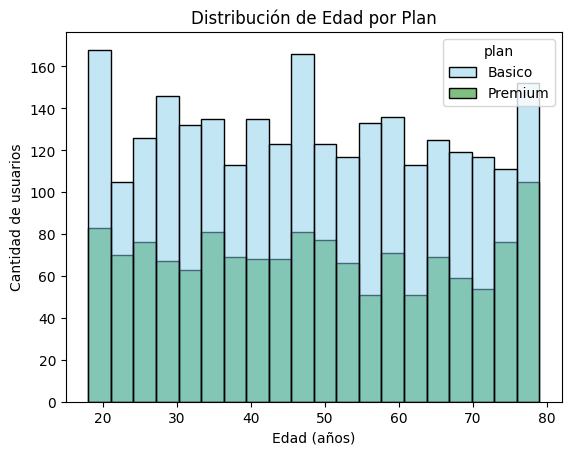

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para visualizar la edad (age)
sns.histplot(data=user_profile, x="age", hue="plan", bins=20,
             palette=["skyblue", "green"])
plt.title("Distribución de Edad por Plan")
plt.xlabel("Edad (años)")
plt.ylabel("Cantidad de usuarios")
plt.show()


💡Insights:
- Distribución simétrica (sin un sesgo extremo), con concentración en edades adultas.

No hay un patrón muy marcado de separación entre Básico y Premium; ambos planes aparecen a lo largo de rangos similares de edad. Si acaso, Premium suele verse ligeramente más concentrado en edades medias/altas, pero no es una diferencia fuerte.

La edad por sí sola no explica claramente la elección del plan; habría que cruzarlo con uso (llamadas/mensajes/minutos) para encontrar diferencias más accionables.

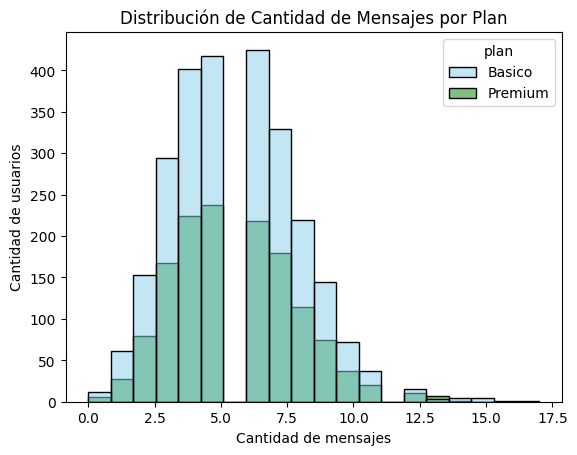

In [ ]:
# Histograma para visualizar la cant_mensajes
sns.histplot(data=user_profile, x="cant_mensajes", hue="plan", bins=20,
             palette=["skyblue", "green"])
plt.title("Distribución de Cantidad de Mensajes por Plan")
plt.xlabel("Cantidad de mensajes")
plt.ylabel("Cantidad de usuarios")
plt.show()



💡Insights:
Distribución es unimodal y ligeramente sesgada a la derecha: la mayoría de usuarios está entre 3 y 9 mensajes, y hay una cola con pocos casos llegando aprox. a 12–16.
No se ve un patrón muy marcado de que Premium envíe muchos más mensajes que Básico; las formas se superponen bastante.

Como el gráfico está en frecuencia absoluta, se ven más barras de Básico principalmente porque hay más usuarios en ese plan, no necesariamente porque envíen más mensajes.

Outliers: Hay pocos usuarios con cant_mensajes muy alta (≈12+), que podrían revisarse como heavy users o casos atípicos.

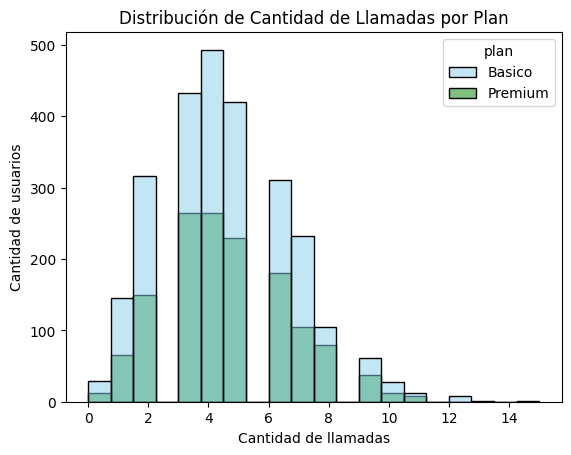

In [ ]:
# Histograma para visualizar la cant_llamadas
sns.histplot(data=user_profile, x="cant_llamadas", hue="plan", bins=20,
             palette=["skyblue", "green"])
plt.title("Distribución de Cantidad de Llamadas por Plan")
plt.xlabel("Cantidad de llamadas")
plt.ylabel("Cantidad de usuarios")
plt.show()


💡Insights:
- Distribución es unimodal y sesgada a la derecha: la mayoría de usuarios se concentra entre 3 y 7 llamadas, con una cola de pocos usuarios que llega aproximadamente a 10–15.

Las distribuciones de Básico y Premium se superponen mucho, así que no hay una diferencia clara en cantidad de llamadas por plan. (De nuevo, Básico aparece con más altura por tener más usuarios.)

Posibles outliers: Hay pocos casos con 10+ llamadas, que podrían revisarse como heavy callers (usuarios intensivos) o para validar si son registros atípicos.

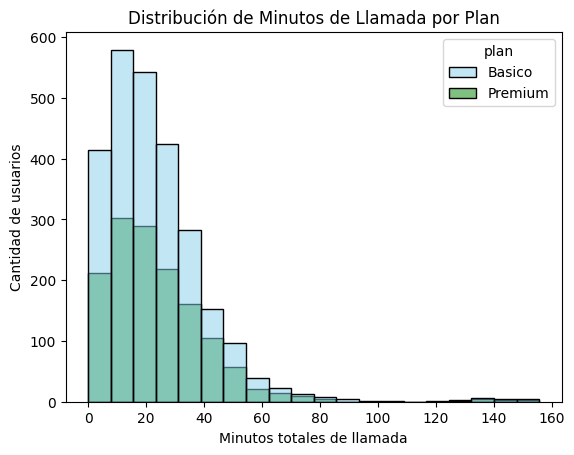

In [ ]:
# Histograma para visualizar la cant_minutos_llamada
sns.histplot(data=user_profile, x="cant_minutos_llamada", hue="plan", bins=20,
             palette=["skyblue", "green"])
plt.title("Distribución de Minutos de Llamada por Plan")
plt.xlabel("Minutos totales de llamada")
plt.ylabel("Cantidad de usuarios")
plt.show()



💡Insights:
- Distribución sesgada a la derecha: la mayoría de usuarios acumula pocos minutos (aprox. 0–40), pero existe una cola larga con pocos casos que llegan hasta ~150–160 minutos.
Las distribuciones de Básico y Premium se parecen mucho (alta superposición). No se observa una separación clara donde Premium tenga sistemáticamente más minutos; lo que sí se ve es que ambos planes tienen heavy users en la cola.

Outliers / casos a revisar: Los usuarios con >80–100 minutos son pocos y destacan como posibles heavy callers (o registros atípicos). Conviene identificarlos con IQR/Z-score y revisar si concentran consumo extremo.

### 5.2 Identificación de Outliers

🎯 **Objetivo:**  
Detectar valores extremos en las variables clave de **uso** y **clientes** que podrían afectar el análisis, y decidir si requieren limpieza o revisión adicional.

**Instrucciones:**  
- Usa **boxplots** para identificar visualmente outliers en las siguientes columnas:  
  - `age`
  - `cant_mensajes`
  - `cant_llamadas`
  - `total_minutos_llamada`  
- Crea un **for** para generar los 4 boxplots automáticamente.
<br>

- Después de crear los gráfico, responde si **existen o no outliers** en las variables.  
- Si hay outliers, crea otro bucle para calcular los límites de esas columnas usando el **método IQR** y decide qué hacer con ellos.
  - Si solamente hay outliers de un solo lado, no es necesario calcular ambos límites.

**Hint:**
- Dentro del bucle, usa `plt.title(f'Boxplot: {col}')` para que el título cambie acorde a la columna.

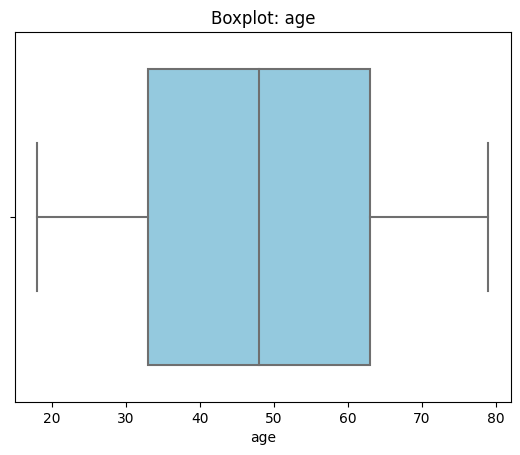

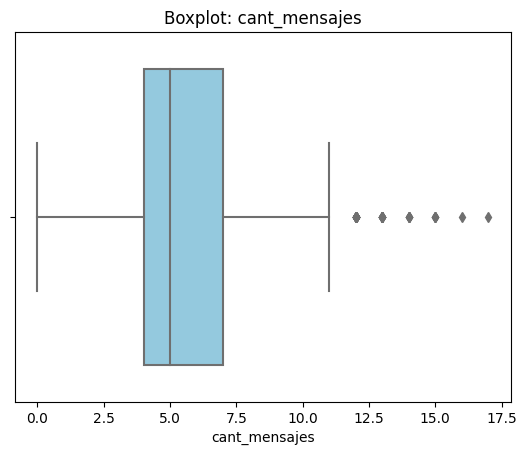

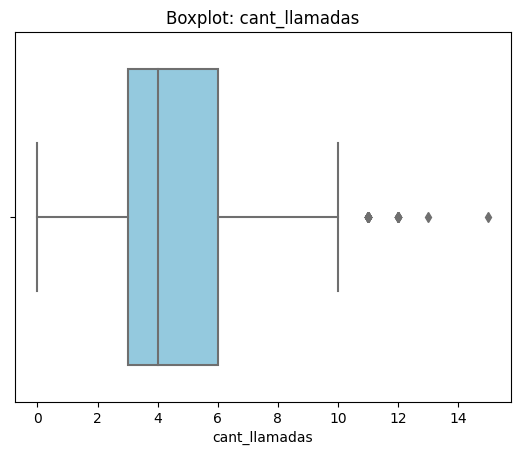

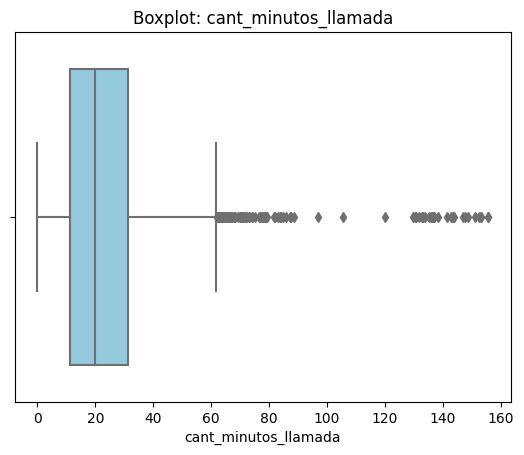

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando usando BoxPlot
columnas_numericas = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_numericas:
    sns.boxplot(x=user_profile[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.xlabel(col)
    plt.show()


💡Insights:
- Age: No presenta outliers
- cant_mensajes: Si presenta outliers
- cant_llamadas: Si presenta outliers
- cant_minutos_llamada: Si presenta outliers (Muchos visiblemente)

In [ ]:

# Calcular límites con el método IQR
columnas_limites = ['age', 'cant_mensajes', 'cant_llamadas', 'cant_minutos_llamada']

for col in columnas_limites:
    s = pd.to_numeric(user_profile[col], errors="coerce").dropna()

    Q1 = s.quantile(0.25)
    Q3 = s.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = user_profile[(user_profile[col] < lower) | (user_profile[col] > upper)]

    print(f"\n{col}")
    print("Q1:", Q1, "| Q3:", Q3, "| IQR:", IQR)
    print("Límite inferior:", lower, "| Límite superior:", upper)
    print("Cantidad de outliers:", outliers.shape[0])



age
Q1: 33.0 | Q3: 63.0 | IQR: 30.0
Límite inferior: -12.0 | Límite superior: 108.0
Cantidad de outliers: 0

cant_mensajes
Q1: 4.0 | Q3: 7.0 | IQR: 3.0
Límite inferior: -0.5 | Límite superior: 11.5
Cantidad de outliers: 46

cant_llamadas
Q1: 3.0 | Q3: 6.0 | IQR: 3.0
Límite inferior: -1.5 | Límite superior: 10.5
Cantidad de outliers: 30

cant_minutos_llamada
Q1: 11.12 | Q3: 31.415 | IQR: 20.295
Límite inferior: -19.322500000000005 | Límite superior: 61.8575
Cantidad de outliers: 109


In [ ]:

# Revisa los limites superiores y el max, para tomar la decisión de mantener los outliers o no
user_profile[columnas_limites].describe()


,age,cant_mensajes,cant_llamadas,cant_minutos_llamada
count,4000.000000,3999.000000,3999.000000,3999.000000
mean,48.136000,5.524381,4.478120,23.317054
std,17.689919,2.358416,2.144238,18.168095
min,18.000000,0.000000,0.000000,0.000000
25%,33.000000,4.000000,3.000000,11.120000
50%,48.000000,5.000000,4.000000,19.780000
75%,63.000000,7.000000,6.000000,31.415000
max,79.000000,17.000000,15.000000,155.690000


💡Insights:

cant_mensajes: mantener outliers.
Porque el máximo (17) no es “imposible”; probablemente son usuarios intensivos (heavy users). Quitarlos podría ocultar un segmento real y útil para negocio.

cant_llamadas: mantener outliers.
El máximo (15) sigue siendo razonable para comportamiento humano (sobre todo en un periodo mensual/semanal según el dataset). Son casos extremos pero plausibles, valiosos para segmentación.

cant_minutos_llamada: mantener outliers, pero revisar los más altos.
Aquí sí hay una cola más larga (máx ~155.7) y podría incluir heavy callers o algún caso raro. Recomendación: no eliminarlos por defecto, sino revisarlos (por ejemplo, top 1% o outliers por IQR) para confirmar que no sean errores/fraude; si son válidos, se conservan y se analizan por separado (segmento “alto consumo”).

---

## 🧩Paso 6: Segmentación de Clientes

### 6.1 Segmentación de Clientes Por Uso

🎯 **Objetivo:** Clasificar a cada usuario en un grupo de uso (Bajo uso, Uso medio, Alto uso) basándose en la cantidad de llamadas y mensajes registrados.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_uso` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones de llamadas y mensajes y asigna:
  - `'Bajo uso'` cuando llamadas < 5 y mensajes < 5
  - `'Uso medio'` cuando llamadas < 10 y mensajes < 10
  - `'Alto uso'` para el resto de casos

In [ ]:
# Crear columna grupo_uso
user_profile["grupo_uso"] = "Alto uso"

user_profile.loc[
    (user_profile["cant_llamadas"] < 5) & (user_profile["cant_mensajes"] < 5),
    "grupo_uso"
] = "Bajo uso"

user_profile.loc[
    (user_profile["cant_llamadas"] < 10) & (user_profile["cant_mensajes"] < 10) &
    ~((user_profile["cant_llamadas"] < 5) & (user_profile["cant_mensajes"] < 5)),
    "grupo_uso"
] = "Uso medio"

# Verificar
print(user_profile["grupo_uso"].value_counts())



Uso medio    2943
Bajo uso      778
Alto uso      279
Name: grupo_uso, dtype: int64


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso


### 6.2 Segmentación de Clientes Por Edad

🎯 **Objetivo:**: Clasificar a cada usuario en un grupo por **edad**.

**Instrucciones:**  
- Crea una nueva columna llamada `grupo_edad` en el dataframe `user_profile`.
- Usa comparaciones lógicas (<, >) para evaluar las condiciones y asigna:
  - `'Joven'` cuando age < 30
  - `'Adulto'` cuando age < 60
  - `'Adulto Mayor'` para el resto de casos

In [ ]:

# Crear columna grupo_edad
user_profile["grupo_edad"] = "Adulto Mayor"  # valor por defecto

user_profile.loc[user_profile["age"] < 30, "grupo_edad"] = "Joven"

user_profile.loc[
    (user_profile["age"] < 60) & ~(user_profile["age"] < 30),
    "grupo_edad"
] = "Adulto"

# Verificar
print(user_profile["grupo_edad"].value_counts())



Adulto          2018
Adulto Mayor    1222
Joven            760
Name: grupo_edad, dtype: int64


In [ ]:
# verificar cambios
user_profile.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,cant_mensajes,cant_llamadas,cant_minutos_llamada,grupo_uso,grupo_edad
0,10000,Carlos,Garcia,38.0,Medellín,2022-01-01 00:00:00.000000000,Basico,NaN,7.0,3.0,23.70,Uso medio,Adulto
1,10001,Mateo,Torres,53.0,<NA>,2022-01-01 06:34:17.914478619,Basico,NaN,5.0,10.0,33.18,Alto uso,Adulto
2,10002,Sofia,Ramirez,57.0,CDMX,2022-01-01 13:08:35.828957239,Basico,NaN,5.0,2.0,10.74,Uso medio,Adulto
3,10003,Mateo,Ramirez,69.0,Bogotá,2022-01-01 19:42:53.743435858,Premium,NaN,11.0,3.0,8.99,Alto uso,Adulto Mayor
4,10004,Mateo,Torres,63.0,GDL,2022-01-02 02:17:11.657914478,Basico,NaN,4.0,3.0,8.01,Bajo uso,Adulto Mayor


### 6.3 Visualización de la Segmentación de Clientes

🎯 **Objetivo:** Visualizar la distribución de los usuarios según los grupos creados: **grupo_uso** y **grupo_edad**.

**Instrucciones:**  
- Crea dos gráficos para las variables categóricas `grupo_uso` y `grupo_edad`.
- Agrega título y etiquetas a los ejes en cada gráfico.

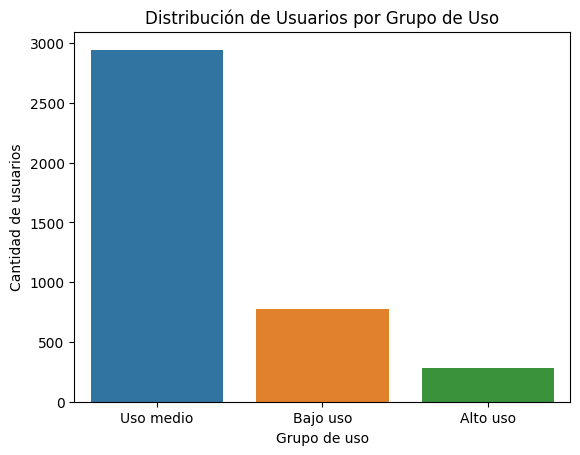

In [ ]:

# Visualización de los segmentos por uso
sns.countplot(data=user_profile, x="grupo_uso", order=user_profile["grupo_uso"].value_counts().index)
plt.title("Distribución de Usuarios por Grupo de Uso")
plt.xlabel("Grupo de uso")
plt.ylabel("Cantidad de usuarios")
plt.show()



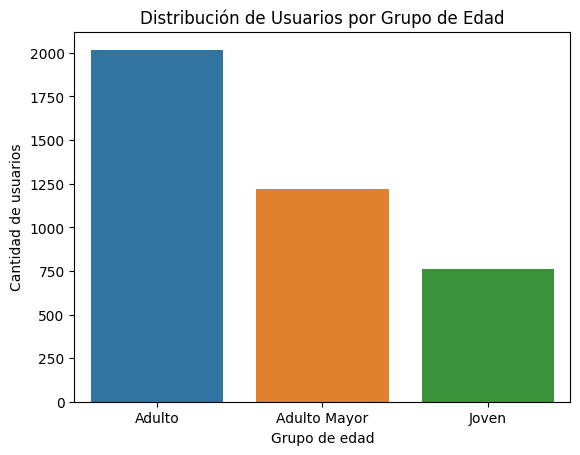

In [ ]:
# Visualización de los segmentos por edad
sns.countplot(data=user_profile, x="grupo_edad", order=user_profile["grupo_edad"].value_counts().index)
plt.title("Distribución de Usuarios por Grupo de Edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Cantidad de usuarios")
plt.show()





---
## 🧩Paso 7: Insight Ejecutivo para Stakeholders

🎯 **Objetivo:** Traducir los hallazgos del análisis en conclusiones accionables para el negocio, enfocadas en segmentación, patrones de uso y oportunidades comerciales.

**Preguntas a responder:**
- ¿Qué problemas tenían originalmemte los datos?¿Qué porcentaje, o cantidad de filas, de esa columna representaban?


- ¿Qué segmentos de clientes identificaste y cómo se comportan según su edad y nivel de uso?  
- ¿Qué segmentos parecen más valiosos para ConnectaTel y por qué?  
- ¿Qué patrones de uso extremo (outliers) encontraste y qué implican para el negocio?


- ¿Qué recomendaciones harías para mejorar la oferta actual de planes o crear nuevos planes basados en los segmentos y patrones detectados?

✍️ **Escribe aquí tu análisis ejecutivo:**




###Análisis ejecutivo

⚠️ **Problemas detectados en los datos**

users.city: 11.7% nulos (469 registros) y además 2.4% con “?” (96 registros), se estandarizó “?” a NA y se recomienda imputar como “Unknown” para no perder segmentación geográfica.

users.age: tenía el sentinel -999 (edad imposible) que distorsionaba estadísticas, se reemplazó por la mediana para evitar sesgo.

users.reg_date: aparecen 40 registros en 2026 (fuera del rango permitido hasta 2024), se marcaron como NA/NaT para no contaminar análisis temporal.

usage.date: existen 50 nulos → se recomienda excluir esas filas en análisis por tiempo.

usage.duration y usage.length: muchos “nulos” pero son MAR (dependen de type: llamadas vs textos),no se imputan; se analizan por tipo.

🔍 **Segmentos por Edad**

Joven (<30), Adulto (<60), Adulto Mayor (>=60): la distribución por plan no mostró diferencias fuertes solo por edad, por lo que la edad sola no explica el plan.

La segmentación por edad es útil para personalizar oferta (p. ej. comunicación/beneficios), pero el driver real de valor aparece más en uso (llamadas/mensajes/minutos).

📊 **Segmentos por Nivel de Uso**

Se creó grupo_uso:

Bajo uso: llamadas < 5 y mensajes < 5

Uso medio: llamadas < 10 y mensajes < 10

Alto uso: el resto

En distribuciones (histogramas) se observó que mensajes, llamadas y minutos están sesgados a la derecha, es decir: muchos usuarios con uso bajo/medio y pocos con uso alto, existe un segmento pequeño de “heavy users” que concentra consumo.

➡️ Esto sugiere que ConnectaTel tiene una base amplia de usuarios de uso moderado, pero también un grupo reducido con consumo alto que puede estar subatendido por la oferta actual o que representa oportunidad de upsell.

📌 **Segmentos más valiosos para ConnectaTel**

Alto uso (especialmente quienes tienen altos minutos y/o alta actividad): son valiosos porque suelen generar mayor ingreso potencial, mayor probabilidad de migración a planes premium y pueden justificar planes especializados.

Usuarios con uso medio también son estratégicos: son el grupo ideal para campañas de upgrade (tienen consumo suficiente para percibir valor en un plan superior).

🚩 **Patrones de uso extremo (outliers)**

Outliers existen principalmente en las variables de uso:

cant_mensajes (máx ~17), cant_llamadas (máx ~15), cant_minutos_llamada (máx ~155).

Implicación negocio: no parecen “imposibles”; más bien apuntan a heavy users reales. Aun así, los casos extremos (sobre todo en minutos) deberían revisarse como alertas (posible uso inusual, fraude o errores), pero no se recomienda eliminarlos por defecto.

💡 **Recomendaciones**

Crear/ajustar planes por segmento de uso:

Un plan “Alto uso llamadas” (más minutos incluidos o mejor tarifa extra) para heavy callers.

Un plan “Mensajería intensiva” para heavy texters (si el negocio lo monetiza) o bundles.

Estrategia de upsell: orientar campañas a usuarios de Uso medio que están cerca del umbral de “Alto uso” (por ejemplo, llamadas 8–9 y mensajes 8–9) para migrarlos a Premium con incentivos.

Monitoreo de outliers: crear un reporte mensual de usuarios en el top 1–5% de minutos/mensajes para:

1. validar que el uso sea legítimo,

2. ofrecer upgrades,

3. prevenir fraude si aparecen patrones anómalos.

Mejorar captura de datos: reglas de validación en origen para evitar años futuros en reg_date, valores como “?” en city y sentinels en ag

---

## 🧩Paso 8 Cargar tu notebook y README a GitHub

🎯 **Objetivo:**  
Entregar tu análisis de forma **profesional**, **documentada** y **versionada**, asegurando que cualquier persona pueda revisar, ejecutar y entender tu trabajo.



### Opción A : Subir archivos desde la interfaz de GitHub (UI)

1. Descarga este notebook (`File → Download .ipynb`).  
2. Entra a tu repositorio en GitHub (por ejemplo `telecom-analysis` o `sprint7-final-project`).  
3. Sube tu notebook **Add file → Upload files**.  

---

### Opción B : Guardar directo desde Google Colab

1. Abre tu notebook en Colab.  
2. Ve a **File → Save a copy in GitHub**.  
3. Selecciona el repositorio y la carpeta correcta (ej: `notebooks/`).  
4. Escribe un mensaje de commit claro, por ejemplo:  
    - `feat: add final ConnectaTel analysis`
    - `agregar version final: Análisis ConnectaTel`
5. Verifica en GitHub que el archivo quedó en el lugar correcto y que el historial de commits se mantenga limpio.

---

Agrega un archivo `README.md` que describa de forma clara:
- el objetivo del proyecto,  
- los datasets utilizados,  
- las etapas del análisis realizadas,  
- cómo ejecutar el notebook (por ejemplo, abrirlo en Google Colab),  
- una breve guía de reproducción.
---

Link a repositorio público del proyecto: `LINK a tu repo aquí`